In [247]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [248]:
df = pd.read_csv("https://raw.githubusercontent.com/ektanegi25/Cement-strength-prediction-project/main/cement_data.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [249]:
name_col= df.columns.to_list

In [250]:
name_col

<bound method IndexOpsMixin.tolist of Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')>

In [251]:
# Assuming name_col is a method that returns a list
name_col_result = name_col()  # Call the method to get the list

# Now you can use list comprehension
name_col = [i.split('(')[0] for i in name_col_result]
print(name_col)


['Cement ', 'Blast Furnace Slag ', 'Fly Ash ', 'Water  ', 'Superplasticizer ', 'Coarse Aggregate  ', 'Fine Aggregate ', 'Age ', 'Concrete compressive strength']


In [252]:
df.columns = name_col

In [253]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [255]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [256]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [257]:
df.duplicated().sum()

25

In [258]:
df[df.duplicated() == True]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.398217
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.301171
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.201007
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.895819
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.294676


In [259]:
df.drop_duplicates(keep="first",inplace=True)
df.duplicated().sum()

0

In [260]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [261]:
df.reset_index(drop=True, inplace=True)
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


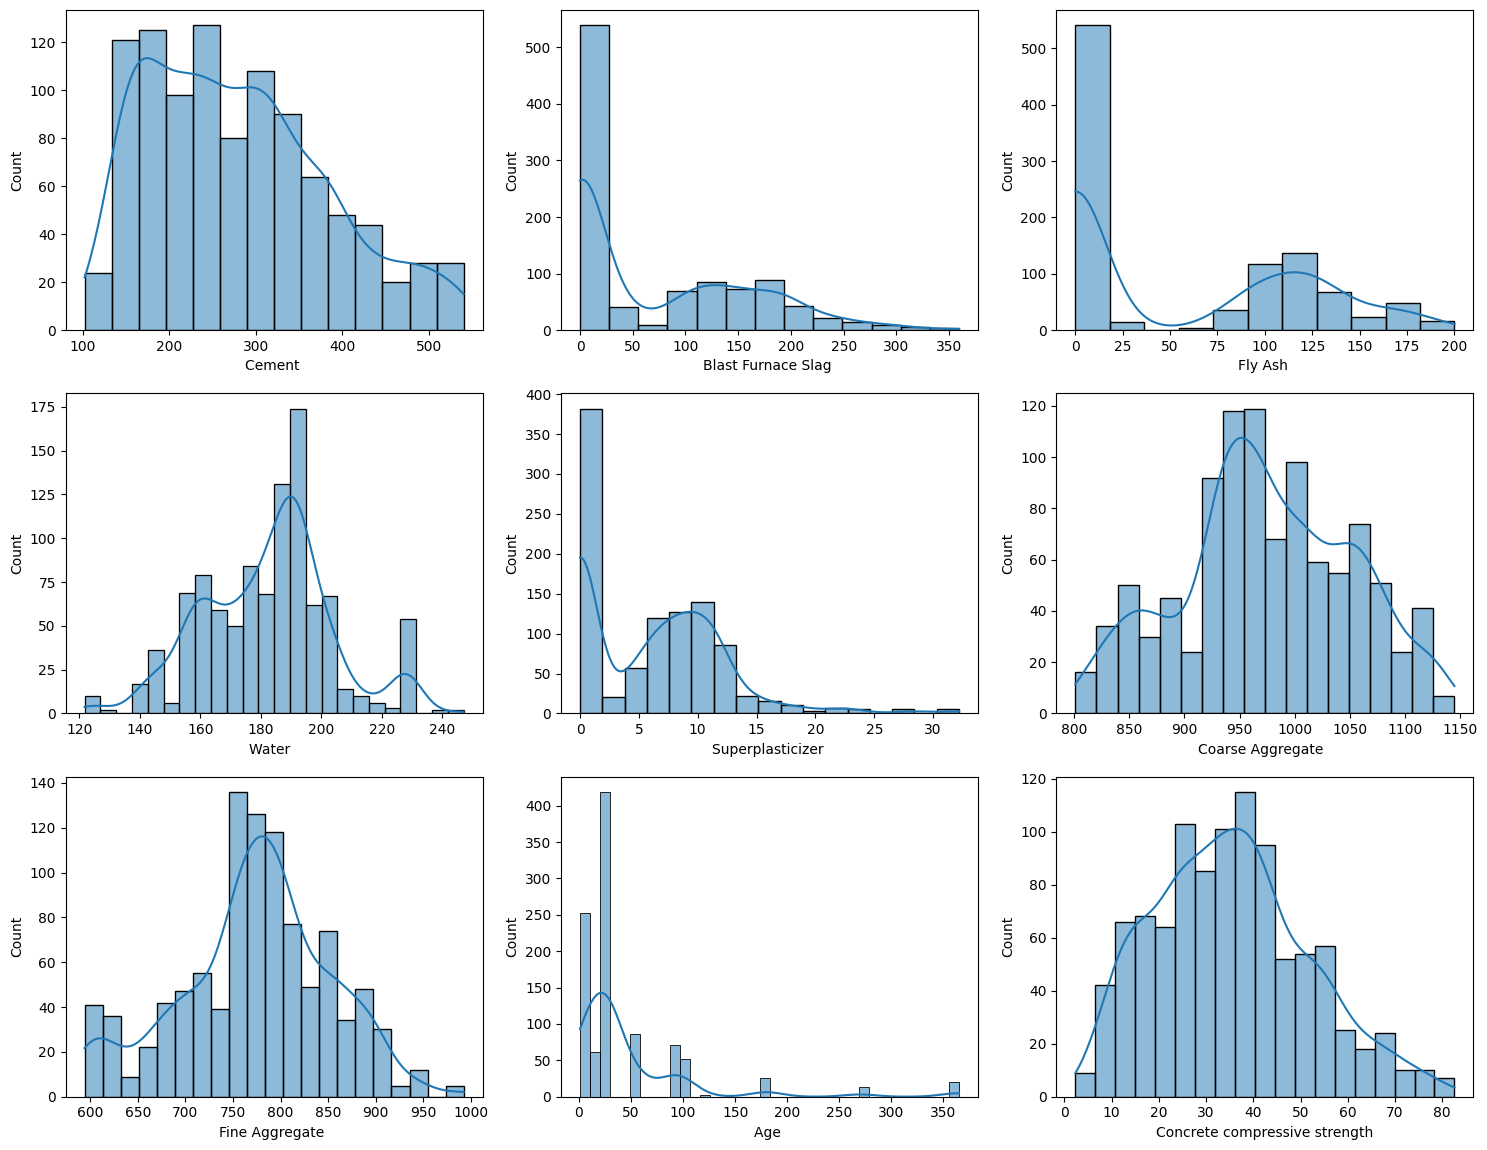

In [262]:
plt.figure(figsize=(15,15),facecolor="white")
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(df[i], kde=True)
    plt.xlabel(i, fontsize=10)
    plotnumber +=1
plt.tight_layout()
plt.show()

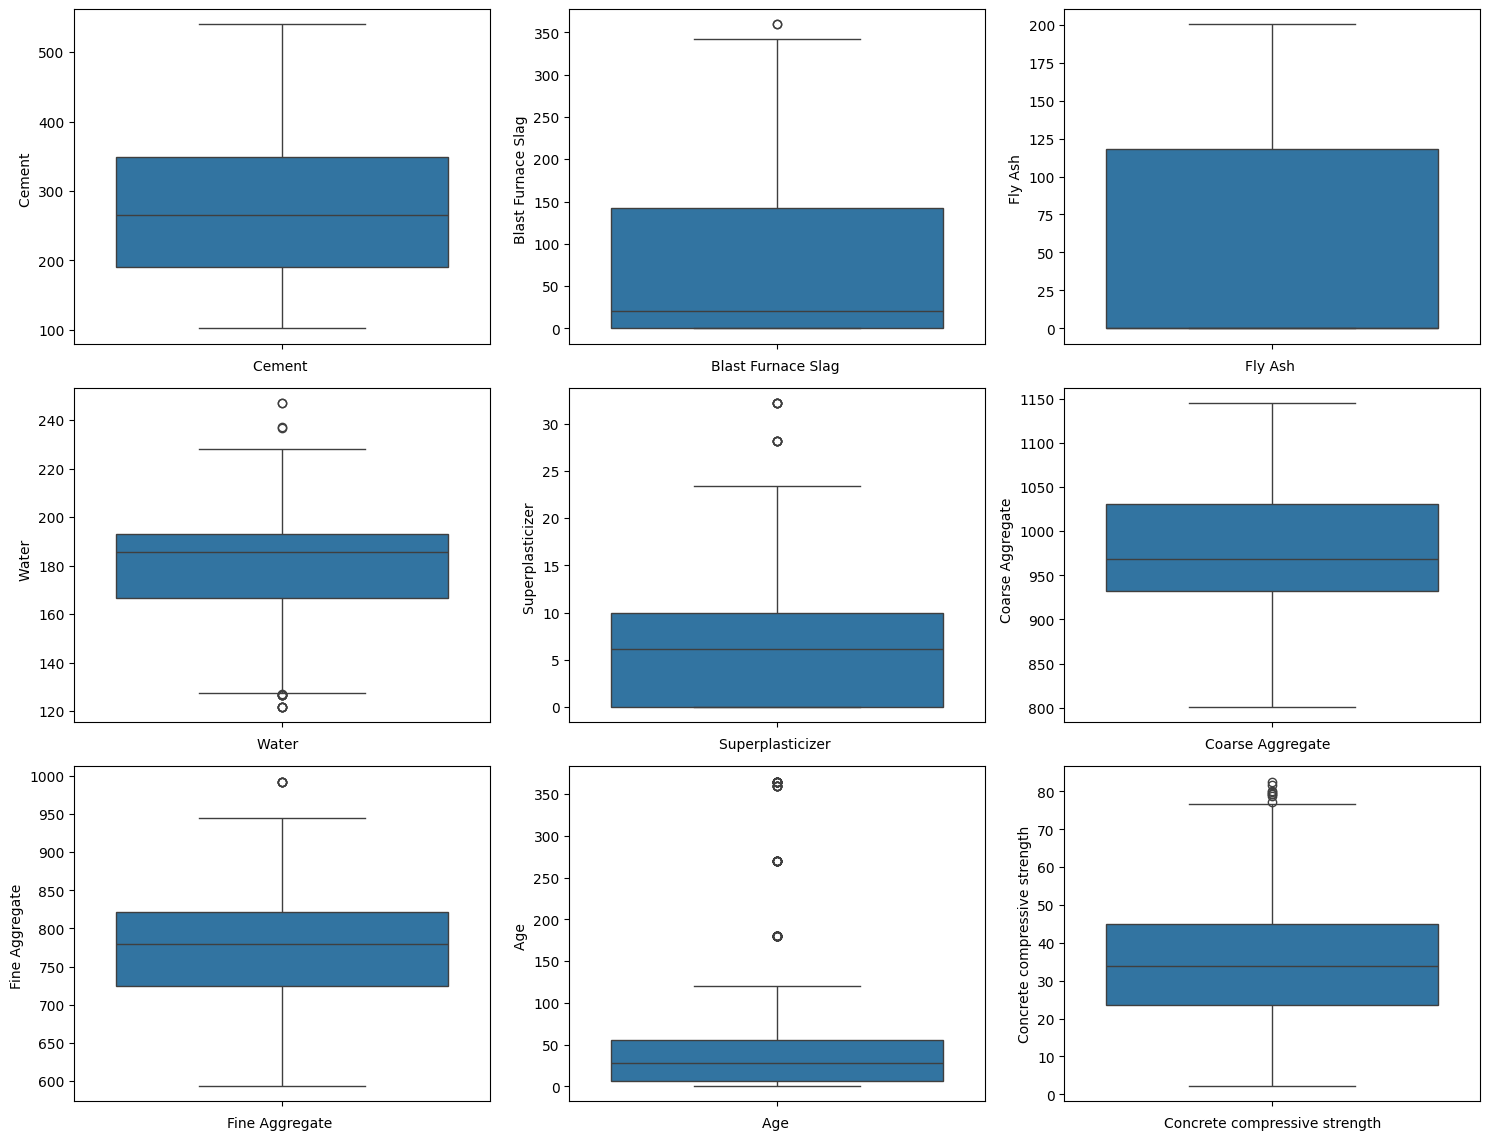

In [263]:
plt.figure(figsize=(15,15), facecolor="white")
plotnumber=1
for i in df.columns:
    plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i, fontsize=10)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [264]:
df.columns= df.columns.str.strip()

In [265]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [266]:
outliers = ['Blast Furnace Slag',"Water", "Superplasticizer", 'Fine Aggregate', 'Age']

In [267]:
outliers

['Blast Furnace Slag', 'Water', 'Superplasticizer', 'Fine Aggregate', 'Age']

In [268]:
def outlier_capping(dataframe: pd.DataFrame, outliers:list):
    df = dataframe.copy()
    for i in outliers:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q3 - 1.5 * iqr
        df.loc[df[i] > upper_limit, i ] = upper_limit
        df.loc[df[i] < lower_limit, i ] = lower_limit
    return df
df = outlier_capping(dataframe=df, outliers=outliers)

C:\Users\shrun\AppData\Local\Temp\ipykernel_3512\4084146931.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '129.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > upper_limit, i ] = upper_limit


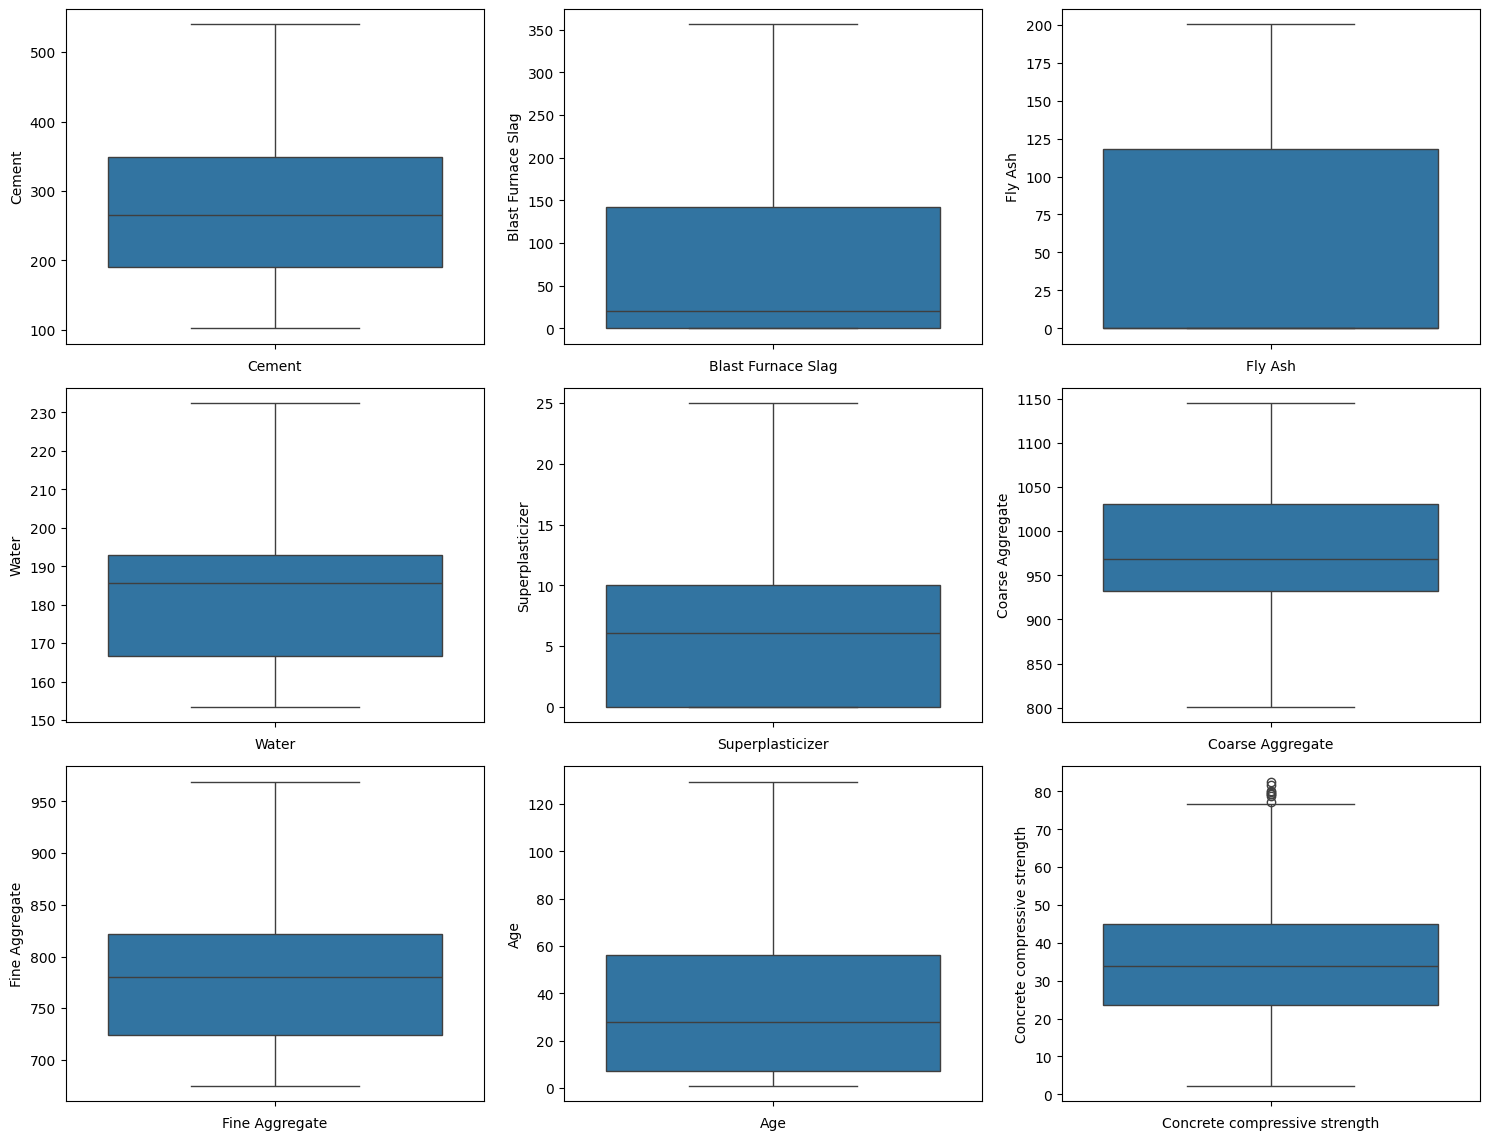

In [269]:
plt.figure(figsize=(15,15),facecolor="White")
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.boxplot(df[i])
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [270]:
X = df.drop('Concrete compressive strength',axis=1)
y = df['Concrete compressive strength']

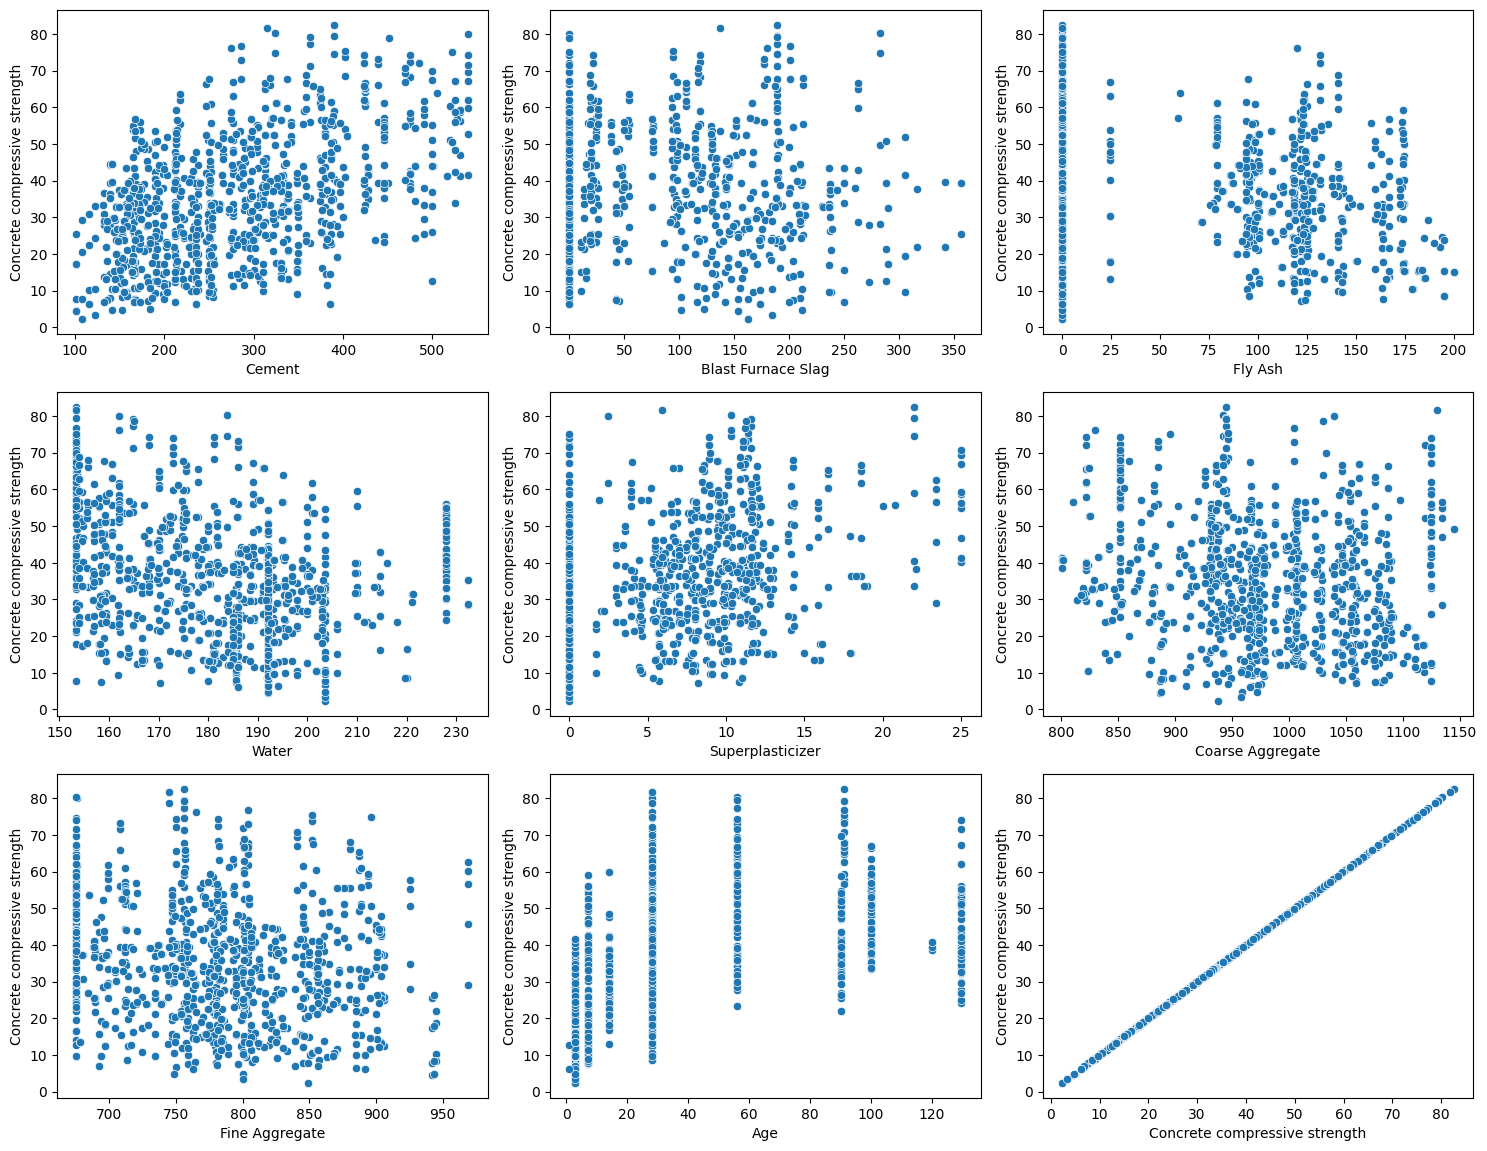

In [271]:
plt.figure(figsize=(15,15),facecolor="White")
plotnumber = 1
for i in df.columns:
    ax = plt.subplot(4,3,plotnumber)
    sns.scatterplot(x = df[i], y = y)
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

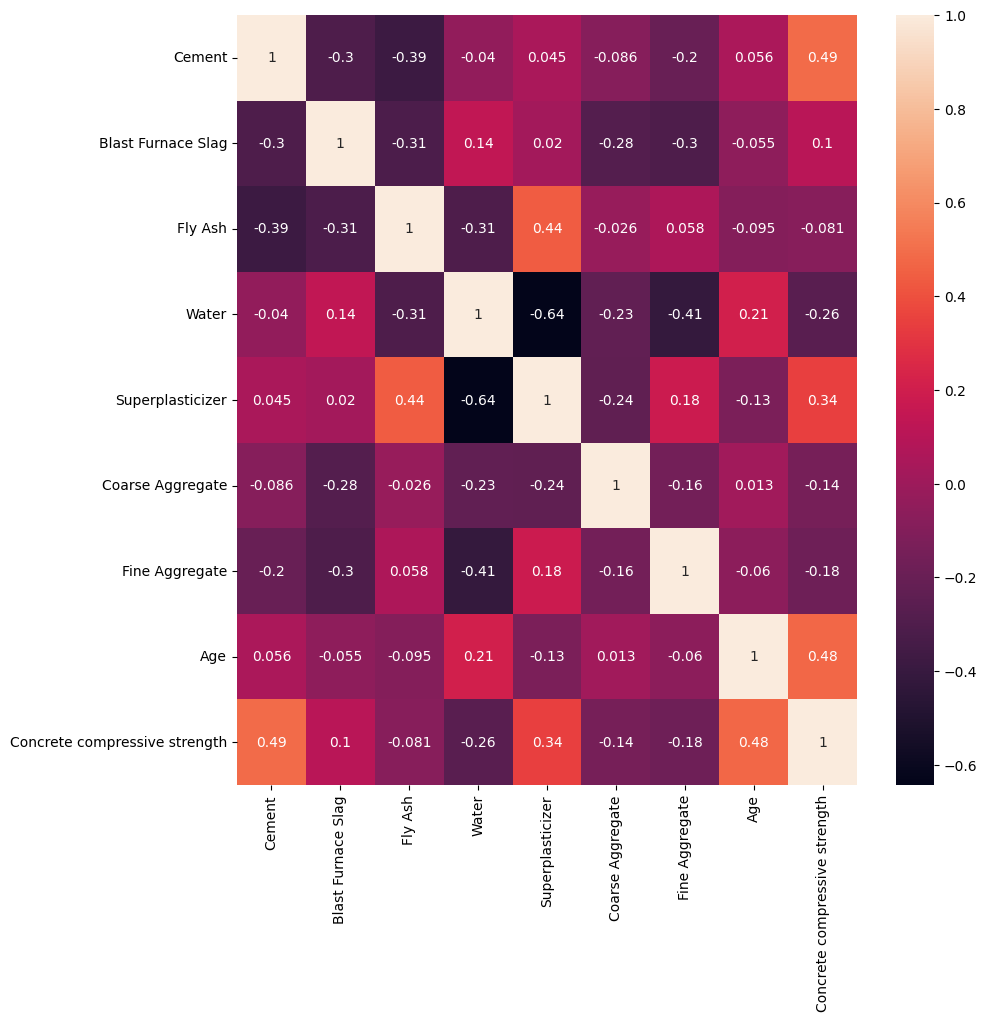

In [272]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [273]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [274]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score

In [275]:
def check_model_performance(preprocessor,X_train,y_train,X_test,y_test):
    models= {
        "Linear Regression":LinearRegression(),
        "Ridge Regression":Ridge(alpha=1),
        "Lasso Regression":Lasso(alpha=1),
        "RandomForestRegressor":RandomForestRegressor(max_depth=5),
        "GradientBoostingRegressor":GradientBoostingRegressor(learning_rate=0.1)
    }
    for model_name , model in models.items():
        pipeline = make_pipeline(preprocessor,model)
        pipeline.fit(X_train,y_train)
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test,y_pred)
        r2 = r2_score(y_test,y_pred)
        print(f"{model_name} - mean squared Error = {mse:.2f} \n {model_name} - R2score = {r2:.2f}")
        

In [276]:
preprocessor_1 = make_pipeline(KNNImputer(n_neighbors=3),StandardScaler())
preprocessor_2 = make_pipeline(KNNImputer(n_neighbors=3),MinMaxScaler())
preprocessor_3 = make_pipeline(KNNImputer(n_neighbors=3),RobustScaler())

print(f"{'=' * 10} Result For StandardScaler {'=' *10}")
check_model_performance(preprocessor_1,X_train,y_train,X_test,y_test)

print(f"{'=' * 10} Result For MinMaxScaler {'=' *10}")
check_model_performance(preprocessor_2,X_train,y_train,X_test,y_test)

print(f"{'=' * 10} Result For RobustScaler {'=' *10}")
check_model_performance(preprocessor_3,X_train,y_train,X_test,y_test)

========== Result For StandardScaler ==========
Linear Regression - mean squared Error = 88.36 
 Linear Regression - R2score = 0.69
Ridge Regression - mean squared Error = 88.32 
 Ridge Regression - R2score = 0.69
Lasso Regression - mean squared Error = 100.03 
 Lasso Regression - R2score = 0.65
RandomForestRegressor - mean squared Error = 53.14 
 RandomForestRegressor - R2score = 0.82
GradientBoostingRegressor - mean squared Error = 34.31 
 GradientBoostingRegressor - R2score = 0.88
========== Result For MinMaxScaler ==========
Linear Regression - mean squared Error = 88.36 
 Linear Regression - R2score = 0.69
Ridge Regression - mean squared Error = 88.32 
 Ridge Regression - R2score = 0.69
Lasso Regression - mean squared Error = 181.19 
 Lasso Regression - R2score = 0.37
RandomForestRegressor - mean squared Error = 52.71 
 RandomForestRegressor - R2score = 0.82
GradientBoostingRegressor - mean squared Error = 34.34 
 GradientBoostingRegressor - R2score = 0.88
========== Result For Ro

In [277]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100,200],
             'learning_rate' : [0.1, 0.01],
             'max_depth' : [5,3,7],
             'min_samples_split': [2,4],
             'min_samples_leaf' : [1,2,3]}

gb_rg = GradientBoostingRegressor()

grid = GridSearchCV(gb_rg, param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [5, 3, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [278]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 200}

In [279]:
grid.best_estimator_

GradientBoostingRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                          n_estimators=200)

In [280]:
grid.best_estimator_.score(X_test,y_test)

0.9244505521602946

In [281]:
y_pred = grid.best_estimator_.predict(y_test)
mean_squared_error(y_test, y_pred)

c:\Users\shrun\.conda\envs\butterfly\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[19.009542  24.29093   26.322815  34.569637  44.133358  33.003838
 17.27551   25.42236   33.729164  34.397957  28.98557   49.24927
 41.0514    39.300133  33.729164  15.575263  37.914284  52.82696
 42.030457  47.098106  33.7988    11.169511  47.13258   37.40407
  9.307926  41.885666  58.522724  35.232224  15.520104  44.519466
 43.89204   55.944084  46.89816   47.81516   14.989208  40.19645
 49.773273  53.903233  44.2092    82.59923   43.733463  27.742445
 47.71174   41.05347   58.60546   45.36752   69.83702   36.443634
 74.98741   46.24729   19.53906   54.27555   33.019005   6.902344
 25.726418  37.42476   76.23536   14.589313  44.20782   55.260124
 29.868101  31.715897  38.074245  30.123207  33.687798  61.855846
 44.27815   33.543007  59.494884  51.04191   61.094467  31.350473
 33.274113  37.342022  14.4996805 10.222171  23.345657  13.461329
 36.251957  17.576122  53.52402   25.620928  44.69804   34.7358
 30.275581  15.340841  32.720463  39.42148   28.682201  20.870438
 36.149227  21.911547  28.627043  48.58737   14.203206  51.33149
 39.610397  63.142212  46.201786  50.655113  61.232365  27.041248
 13.35515   12.245093  13.089012  21.022123  34.68064   43.574883
 19.98791   23.786922  23.221552  65.90908   10.35455   52.426376
 66.42412   40.596348  59.76378   24.404692  23.80071   25.745033
 77.29716   32.96385   25.510612  23.690395  21.601284  39.004642
 27.661777  40.058556  57.02656   72.99483    6.267337   2.3318079
 31.02642   56.812824  44.284355  27.9355    14.638265  52.20023
  9.6175    53.300632  33.398216  41.543     45.836365  11.983093
 36.80492   39.84482   41.244453  28.627043  26.855091  67.56865
 46.64305   13.19657   37.362705  13.334466  35.17017   46.23419
 29.87086   24.579819  51.0557    54.378284  45.939785   8.204075
 12.541569  14.843729  15.030577  26.744774  29.785364  32.05167
 48.794216  23.524921  51.95891   37.92118   15.069976   7.3153405
 61.797733  45.89842   29.978416  41.680202  24.428135  13.624045
 25.44787   29.59231   48.98727    4.5650206 25.116625  43.388725
 71.622765  80.19985   81.75117    8.536403  25.689877  31.840002
 26.944721  12.372647  51.021225  23.404953  50.773014  31.646948
 66.94812   13.182781  16.278528  41.299614  38.60376   23.138815
 23.848974  15.748322  44.5236    52.04165   10.383509  16.264738
 24.13166   46.68442   55.064312  79.400055  22.504498  35.865852
 12.838043  22.752708  39.700027  56.743874  25.179663  42.216614
 52.503597  18.029797  66.82401   32.823193  69.65776   40.269535
 14.989208  31.971003  23.890343  24.06547   26.048403  37.91704
 62.05284   50.732334  42.13112   52.90832   26.310404  22.435549
 28.468464  43.942375  41.05278   39.231186  39.26566   16.49916
 35.31427   60.294678  56.61908   28.096148  24.400557  25.965666
 28.296095  43.58178   23.835875  26.200089   7.675936  18.746162
 12.180972  49.993904  47.029846  24.655663  36.838703  33.398216
 37.81362   78.80021   40.93419   21.504757  50.52687   14.396259
  4.827711  41.203087  26.14493   71.29871   39.64487   17.22311
 52.20023   39.28979   25.483032  23.786922  35.30117   28.6298
 33.488834  51.86376   47.73932   33.9429    17.836744  22.435549
 60.280888  35.363224  29.219994  23.6966    56.833508  39.09329
 24.281965  15.8717375  4.7822056  6.4672847 44.86834   52.30365
 36.44777   56.495663 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)

c:\Users\shrun\.conda\envs\butterfly\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[19.009542  24.29093   26.322815  34.569637  44.133358  33.003838
 17.27551   25.42236   33.729164  34.397957  28.98557   49.24927
 41.0514    39.300133  33.729164  15.575263  37.914284  52.82696
 42.030457  47.098106  33.7988    11.169511  47.13258   37.40407
  9.307926  41.885666  58.522724  35.232224  15.520104  44.519466
 43.89204   55.944084  46.89816   47.81516   14.989208  40.19645
 49.773273  53.903233  44.2092    82.59923   43.733463  27.742445
 47.71174   41.05347   58.60546   45.36752   69.83702   36.443634
 74.98741   46.24729   19.53906   54.27555   33.019005   6.902344
 25.726418  37.42476   76.23536   14.589313  44.20782   55.260124
 29.868101  31.715897  38.074245  30.123207  33.687798  61.855846
 44.27815   33.543007  59.494884  51.04191   61.094467  31.350473
 33.274113  37.342022  14.4996805 10.222171  23.345657  13.461329
 36.251957  17.576122  53.52402   25.620928  44.69804   34.7358
 30.275581  15.340841  32.720463  39.42148   28.682201  20.870438
 36.149227  21.911547  28.627043  48.58737   14.203206  51.33149
 39.610397  63.142212  46.201786  50.655113  61.232365  27.041248
 13.35515   12.245093  13.089012  21.022123  34.68064   43.574883
 19.98791   23.786922  23.221552  65.90908   10.35455   52.426376
 66.42412   40.596348  59.76378   24.404692  23.80071   25.745033
 77.29716   32.96385   25.510612  23.690395  21.601284  39.004642
 27.661777  40.058556  57.02656   72.99483    6.267337   2.3318079
 31.02642   56.812824  44.284355  27.9355    14.638265  52.20023
  9.6175    53.300632  33.398216  41.543     45.836365  11.983093
 36.80492   39.84482   41.244453  28.627043  26.855091  67.56865
 46.64305   13.19657   37.362705  13.334466  35.17017   46.23419
 29.87086   24.579819  51.0557    54.378284  45.939785   8.204075
 12.541569  14.843729  15.030577  26.744774  29.785364  32.05167
 48.794216  23.524921  51.95891   37.92118   15.069976   7.3153405
 61.797733  45.89842   29.978416  41.680202  24.428135  13.624045
 25.44787   29.59231   48.98727    4.5650206 25.116625  43.388725
 71.622765  80.19985   81.75117    8.536403  25.689877  31.840002
 26.944721  12.372647  51.021225  23.404953  50.773014  31.646948
 66.94812   13.182781  16.278528  41.299614  38.60376   23.138815
 23.848974  15.748322  44.5236    52.04165   10.383509  16.264738
 24.13166   46.68442   55.064312  79.400055  22.504498  35.865852
 12.838043  22.752708  39.700027  56.743874  25.179663  42.216614
 52.503597  18.029797  66.82401   32.823193  69.65776   40.269535
 14.989208  31.971003  23.890343  24.06547   26.048403  37.91704
 62.05284   50.732334  42.13112   52.90832   26.310404  22.435549
 28.468464  43.942375  41.05278   39.231186  39.26566   16.49916
 35.31427   60.294678  56.61908   28.096148  24.400557  25.965666
 28.296095  43.58178   23.835875  26.200089   7.675936  18.746162
 12.180972  49.993904  47.029846  24.655663  36.838703  33.398216
 37.81362   78.80021   40.93419   21.504757  50.52687   14.396259
  4.827711  41.203087  26.14493   71.29871   39.64487   17.22311
 52.20023   39.28979   25.483032  23.786922  35.30117   28.6298
 33.488834  51.86376   47.73932   33.9429    17.836744  22.435549
 60.280888  35.363224  29.219994  23.6966    56.833508  39.09329
 24.281965  15.8717375  4.7822056  6.4672847 44.86834   52.30365
 36.44777   56.495663 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.